<a href="https://colab.research.google.com/github/lynnc00/deep_learning/blob/assignment-1/02_activities/assignments/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 4s 0us/step


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

# Examine the shape of the training and test sets

train_shape = x_train.shape
test_shape = x_test.shape
image_shape = x_train[0].shape
num_classes = len(np.unique(y_train))

print(f'The shape of the training set: {train_shape}')
print(f'The shape of the test set: {test_shape}')
print(f'The dimension of the image: {image_shape}')
print(f'The number of classes: {num_classes}')

The shape of the training set: (50000, 32, 32, 3)
The shape of the test set: (10000, 32, 32, 3)
The dimension of the image: (32, 32, 3)
The number of classes: 100


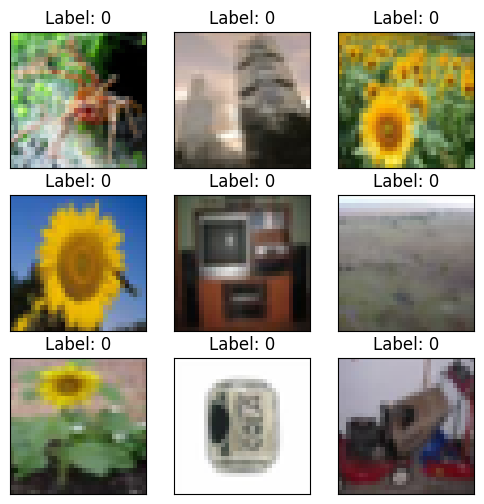

In [5]:
# Examples of the training set

def display_sample_images(x, y, num_samples=9):
    random_indices = np.random.choice(len(x), num_samples, replace=False)
    fig, axes = plt.subplots(3, 3, figsize=(6, 6))

    for i, ax in enumerate(axes.flat):
        ax.imshow(x[random_indices[i]])
        ax.set_title(f'Label: {np.argmax(y[random_indices[i]])}')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

display_sample_images(x_train, y_train)

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Normalizing the pixel value of images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Covert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split the training set
x_train, x_test, y_train, y_test = train_test_split(
    x_train,
    y_train,
    test_size=0.2,
    random_state=42
    )



## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Input layer
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))

# Hidden layer
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 64)                1048640   
                                                                 
 dense_1 (Dense)             (None, 100)               6500      
                                                        

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorial_crossentropy - because this loss function is commonly used for multi-class classification problems, which can measure the difference between true labels and the predicted probabilities.
- <b>Optimizer:</b> adam - because this optimizer is an adaptive learning rate optimization algorithm that works effectively and effcientely for each param.

In [8]:
from keras import optimizers

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [16]:
#

history = model.fit(
    x_train, # Training data
    y_train, # Training labels
    epochs=20, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_data=(x_test, y_test) # Use 20% of the data for validation
)

Epoch 1/20
1250/1250 [==============================] - 83s 67ms/step - loss: 0.2866 - accuracy: 0.9090 - val_loss: 7.4775 - val_accuracy: 0.2644
Epoch 2/20
1250/1250 [==============================] - 98s 78ms/step - loss: 0.2591 - accuracy: 0.9177 - val_loss: 7.8425 - val_accuracy: 0.2643
Epoch 3/20
1250/1250 [==============================] - 128s 103ms/step - loss: 0.2566 - accuracy: 0.9192 - val_loss: 8.2737 - val_accuracy: 0.2557
Epoch 4/20
1250/1250 [==============================] - 119s 95ms/step - loss: 0.2250 - accuracy: 0.9280 - val_loss: 8.6806 - val_accuracy: 0.2621
Epoch 5/20
1250/1250 [==============================] - 128s 102ms/step - loss: 0.2068 - accuracy: 0.9344 - val_loss: 9.1574 - val_accuracy: 0.2645
Epoch 6/20
1250/1250 [==============================] - 125s 100ms/step - loss: 0.2084 - accuracy: 0.9327 - val_loss: 9.4072 - val_accuracy: 0.2571
Epoch 7/20
1250/1250 [==============================] - 89s 72ms/step - loss: 0.1993 - accuracy: 0.9365 - val_loss: 9

I chose 20 epochs becuause it can help us to observe the learning progress througout the whole dataset, this number can be changed based on validation performance.

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 25.4%
- <b>Other metric:</b> F1 score
- <b>Reason for selection:</b> F1 score owns the predictive ability of a model by examining its performance on each class individually, not considering overall performance like accuracy. It combines precision and recall, which is useful for imbalanced dataset.
- <b>Value of metric:</b> 0.2585
- <b>Interpretation of metric value:</b> The higher F1-score that is closer to 1 demonstrates better performance. As this f1 score is below 0.5, which means the model is considered to have a poor performance.

In [17]:
from sklearn.metrics import classification_report, accuracy_score

# Report the accuracy of model

loss, accuracy = model.evaluate(x_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')


# Model prediction

y_prediction = model.predict(x_test)
y_predicted_classes = np.argmax(y_prediction, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
classification_report_str = classification_report(y_true_classes, y_predicted_classes, digits=4)
classification_report_dict = classification_report(y_true_classes, y_predicted_classes, output_dict=True)

# Report another metric F1-score
f1_score = classification_report_dict['weighted avg']['f1-score']

print(f'Value of metric: {f1_score:.4f}')

313/313 [==============================] - 5s 16ms/step - loss: 12.4594 - accuracy: 0.2540
Loss:     12.46
Accuracy: 25.40%
313/313 [==============================] - 7s 22ms/step
Value of metric: 0.2585


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

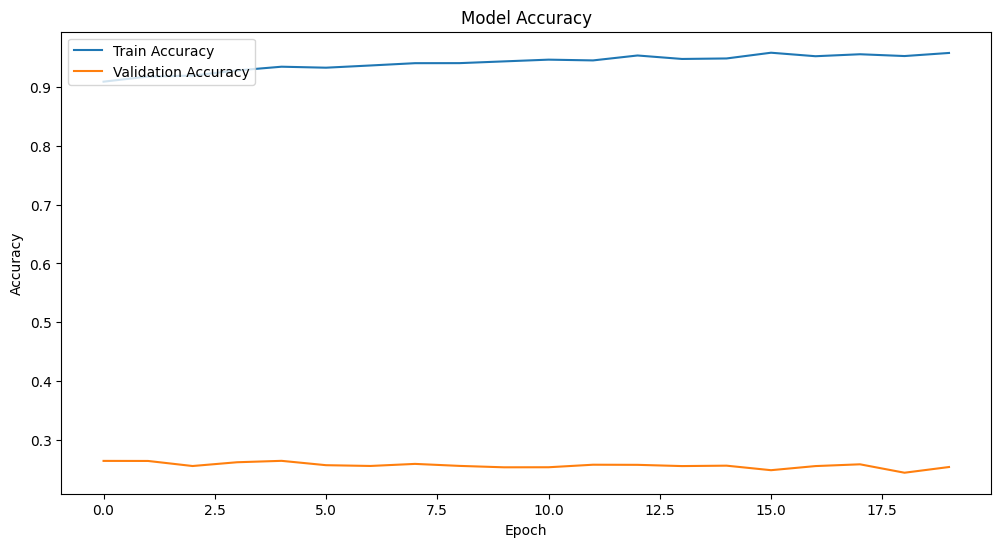

In [18]:
# Plot the training accuracy and validation accuracy

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

313/313 [==============================] - 14s 46ms/step
Correctly Classified Image Probabilities:
[3.42614938e-25 4.57243440e-17 2.09013554e-15 4.07421976e-05
 4.27322648e-03 1.45171826e-19 1.88046083e-21 5.35978302e-07
 6.71761235e-29 4.83723628e-16 1.68801755e-18 1.25854962e-19
 1.50242112e-16 4.27982310e-22 2.12921702e-09 2.54847166e-08
 2.63010107e-23 6.21088873e-19 1.09533424e-07 1.12336742e-13
 1.01549667e-37 3.31987557e-03 1.33119604e-08 1.54850899e-19
 1.02764004e-21 4.38357232e-11 9.37951770e-14 4.22952298e-12
 1.49754790e-21 3.60800040e-12 6.93866175e-20 4.31459739e-08
 5.76463988e-10 1.96004231e-16 5.73792061e-24 5.45290218e-16
 2.00296355e-12 1.10194942e-15 7.75231292e-19 3.08483978e-15
 9.87237958e-10 1.29880340e-25 2.50188013e-11 1.01677862e-13
 6.82816434e-14 2.31083971e-11 1.52181454e-15 1.55840885e-22
 4.88184045e-30 2.52709183e-19 3.40564968e-03 2.60739555e-11
 4.72992515e-16 1.29648347e-30 4.44575458e-19 1.25854480e-04
 1.06230933e-21 2.02629154e-16 2.19176966e-25 9

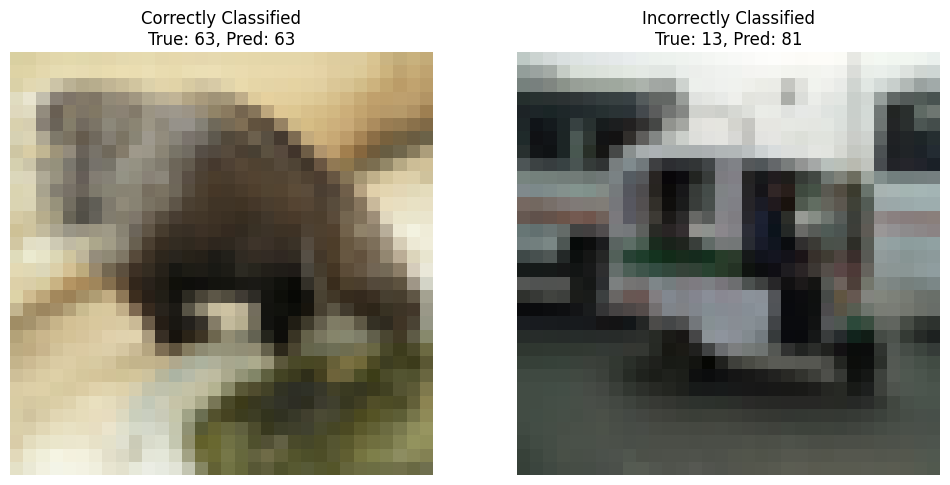

In [19]:
#Get the predictions for the test data

y_predictions = model.predict(x_test)
y_predicted_classes = np.argmax(y_predictions, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Get the index of the correctly and incorrectly classified model in test set
correct_indices = np.where(y_predicted_classes == y_true_classes)[0]
incorrect_indices = np.where(y_predicted_classes != y_true_classes)[0]

# Select one correctly and one incorrectly classified model in test set
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Plot the correctly classified image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified\nTrue: {y_true_classes[correct_idx]}, Pred: {y_predicted_classes[correct_idx]}")
plt.axis('off')

print("Correctly Classified Image Probabilities:")
print(y_predictions[correct_idx])

# Plot the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified\nTrue: {y_true_classes[incorrect_idx]}, Pred: {y_predicted_classes[incorrect_idx]}")
plt.axis('off')

print("\nIncorrectly Classified Image Probabilities:")
print(y_predictions[incorrect_idx])

plt.show()

1. The model accuracy plot shows training accuracy is very high but the validation accuracy is significantly lower. This indicates that the learning model fit the training data well but is overfitting the training data.

2.The model's classification probabilites for the correctly classified image show a high probability for the correct class and lower probabilities for others. Also, the classification probabilities for the incorrectly classified image show a high probability for incorrect class and lower probabilities for others, which shows this model is confident in its incorrect prediction.

Based on the observation, we can understand that the model needs to improve the generalization, which can be considered by using other advanced techniques.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [20]:
from keras.optimizers import SGD

model = Sequential()

# Input layer
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))

# Hidden layer
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(100, activation='softmax'))

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.SGD(learning_rate=0.1, momentum=0.9),
    metrics=['accuracy']
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1048640   
                                                                 
 dense_3 (Dense)             (None, 100)               6500      
                                                      

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [21]:
# Train the model

history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_test, y_test)
)

# Evaluate the accuracy
loss, accuracy = model.evaluate(x_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

# Model prediction

y_prediction = model.predict(x_test)
y_predicted_classes = np.argmax(y_prediction, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
classification_report_str = classification_report(y_true_classes, y_predicted_classes, digits=4)
classification_report_dict = classification_report(y_true_classes, y_predicted_classes, output_dict=True)

# Report another metric F1-score
f1_score = classification_report_dict['weighted avg']['f1-score']

print(f'Value of metric: {f1_score:.4f}')

Epoch 1/20
1250/1250 [==============================] - 78s 61ms/step - loss: 4.6114 - accuracy: 0.0103 - val_loss: 4.6107 - val_accuracy: 0.0096
Epoch 2/20
1250/1250 [==============================] - 75s 60ms/step - loss: 4.6142 - accuracy: 0.0094 - val_loss: 4.6125 - val_accuracy: 0.0082
Epoch 3/20
1250/1250 [==============================] - 77s 62ms/step - loss: 4.6141 - accuracy: 0.0094 - val_loss: 4.6135 - val_accuracy: 0.0096
Epoch 4/20
1250/1250 [==============================] - 75s 60ms/step - loss: 4.6137 - accuracy: 0.0100 - val_loss: 4.6154 - val_accuracy: 0.0088
Epoch 5/20
1250/1250 [==============================] - 75s 60ms/step - loss: 4.6136 - accuracy: 0.0095 - val_loss: 4.6127 - val_accuracy: 0.0093
Epoch 6/20
1250/1250 [==============================] - 75s 60ms/step - loss: 4.6130 - accuracy: 0.0106 - val_loss: 4.6164 - val_accuracy: 0.0089
Epoch 7/20
1250/1250 [==============================] - 77s 61ms/step - loss: 4.6142 - accuracy: 0.0096 - val_loss: 4.6127 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

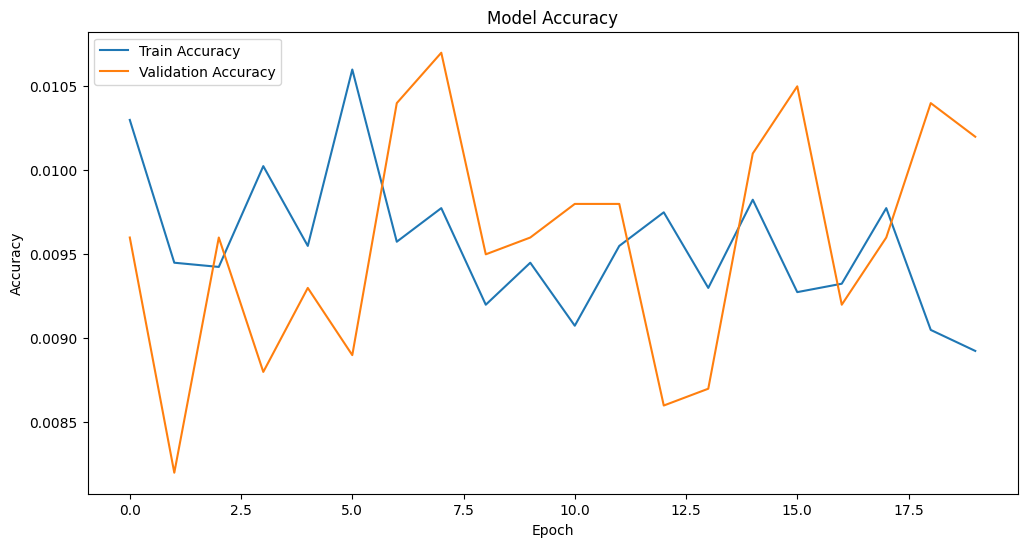

In [22]:
# Plot the training accuracy and validation accuracy

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

313/313 [==============================] - 5s 16ms/step
Correctly Classified Image Probabilities:
[0.00911803 0.01112435 0.00835852 0.0080343  0.00978492 0.00979494
 0.01071305 0.00996886 0.00987727 0.01022626 0.01027155 0.008784
 0.00976507 0.00859368 0.00991759 0.00943467 0.0101366  0.01017566
 0.00841451 0.01003205 0.01081962 0.00847478 0.00827537 0.0104014
 0.00897721 0.01007329 0.01046292 0.00907664 0.00927133 0.00960096
 0.00979107 0.01147678 0.00962255 0.00965083 0.01210313 0.00969293
 0.00901885 0.0097348  0.00981583 0.00755305 0.00952893 0.01146258
 0.01029396 0.01061419 0.01131611 0.01032285 0.01174221 0.00902354
 0.00828075 0.01167465 0.01083097 0.00780016 0.00978738 0.0100063
 0.01119717 0.00918988 0.01064839 0.00903381 0.00768838 0.01100708
 0.01006431 0.01114659 0.01087343 0.00966848 0.0098758  0.00919322
 0.01119763 0.01062479 0.01206703 0.01050153 0.00997893 0.00944286
 0.01039935 0.00865505 0.01039983 0.00931541 0.00918447 0.01032002
 0.0119413  0.01192767 0.00952575 0

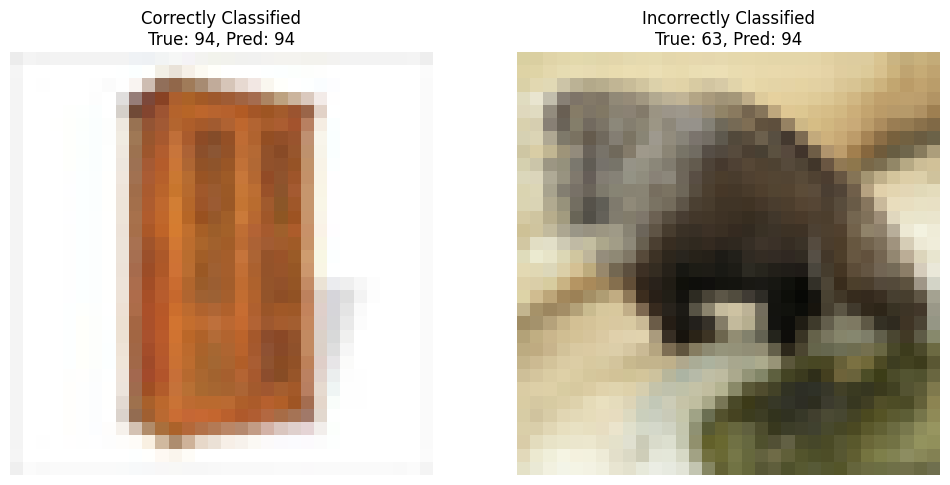

In [23]:
#Get the predictions for the test data

y_predictions = model.predict(x_test)
y_predicted_classes = np.argmax(y_predictions, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Get the index of the correctly and incorrectly classified model in test set
correct_indices = np.where(y_predicted_classes == y_true_classes)[0]
incorrect_indices = np.where(y_predicted_classes != y_true_classes)[0]

# Select one correctly and one incorrectly classified model in test set
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Plot the correctly classified image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified\nTrue: {y_true_classes[correct_idx]}, Pred: {y_predicted_classes[correct_idx]}")
plt.axis('off')

print("Correctly Classified Image Probabilities:")
print(y_predictions[correct_idx])

# Plot the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified\nTrue: {y_true_classes[incorrect_idx]}, Pred: {y_predicted_classes[incorrect_idx]}")
plt.axis('off')

print("\nIncorrectly Classified Image Probabilities:")
print(y_predictions[incorrect_idx])

plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The model's performance didn't improve. The training and validation accuracy both is low, indicating the model's learning is not fit currect training set or validation set by using currect technique. and the classification probabilites are also low in most of cases.

The performance was not improving could be resulted by the inaccurate model architecture currently used, the SDG is too simple to work on currect dataset. Also, the learning rate and momentum value for SDG might not be optimal that is leading to poor covergence.

There exists significant room for improvement, as the low accuracy shows the model is not fit and learning from the dataset. We need to explore more advanced technique with better hyperparameter tuning and other data augmentations to develop the model.

There are some other techniques might we can try in the future, such as advanced architectures (ResNet or DenseNet), adjusted learning rate, regularization, and data augmentation to extend the variety of training examples.




## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.